In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv(r'\RDM\Respiratory_Sound_Database\diagnosis_details.csv')
df.head()

,patient_id,diagnosis,recording_index,chest_location,acquisition_mode,recording_equipment
0,101,URTI,1b1,Al,sc,Meditron
1,101,URTI,1b1,Pr,sc,Meditron
2,102,Healthy,1b1,Ar,sc,Meditron
3,103,Asthma,2b2,Ar,mc,LittC2SE
4,104,COPD,1b1,Al,sc,Litt3200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    int64 
 1   diagnosis            920 non-null    object
 2   recording_index      920 non-null    object
 3   chest_location       920 non-null    object
 4   acquisition_mode     920 non-null    object
 5   recording_equipment  920 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.2+ KB


In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
patient_id,920.0,164.359783,32.025254,101.0,138.0,162.0,192.0,226.0


In [16]:
df.describe(include='object').T

,count,unique,top,freq
diagnosis,920,8,COPD,793
recording_index,920,34,1b1,164
chest_location,920,7,Ar,168
acquisition_mode,920,2,mc,732
recording_equipment,920,4,AKGC417L,646


In [17]:
print(df['diagnosis'].value_counts())

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
LRTI                2
Asthma              1
Name: diagnosis, dtype: int64


In [23]:
df['patient_id'].nunique()

126

In [24]:
df['recording_equipment'].nunique()

4

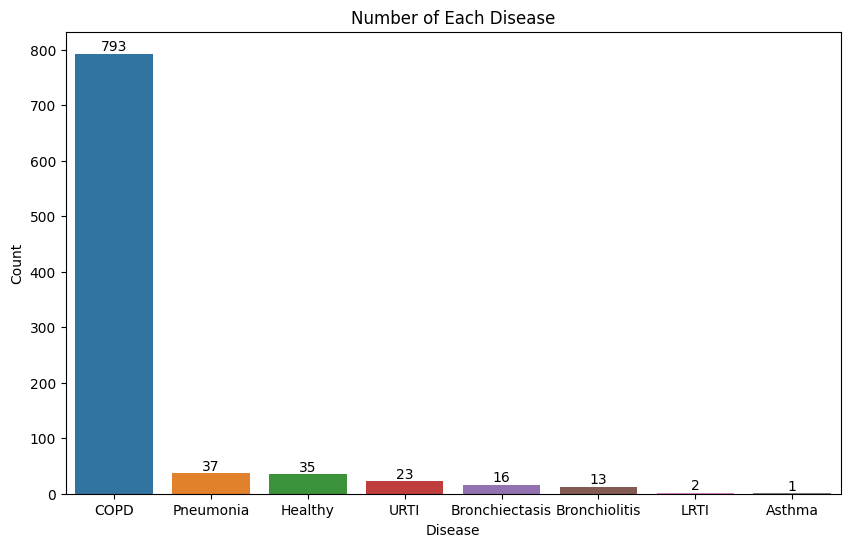

In [32]:
disease_counts = df['diagnosis'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=disease_counts.index, y=disease_counts.values)

# Add counts on top of the bars
for i, value in enumerate(disease_counts.values):
    barplot.text(i, value, value, ha='center', va='bottom')

plt.title('Number of Each Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

This bar graph shows the count of different diseases.
COPD has the highest count with 793 cases.
Pneumonia and Healthy individuals have similar counts (37 and 35 respectively).
Other diseases like URTI, Bronchiectasis, Bronchiolitis, LRTI, and Asthma have significantly lower counts.
The data is highly skewed towards COPD, suggesting a high prevalence or better detection of this condition in the dataset.

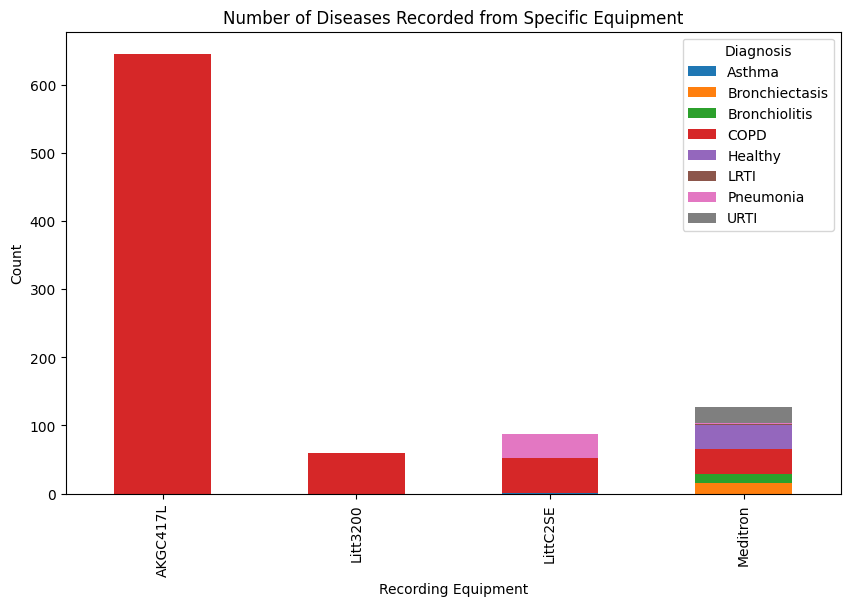

In [29]:

# Group by 'recording_equipment' and 'diagnosis' and count the number of occurrences
grouped = df.groupby(['recording_equipment', 'diagnosis']).size().unstack()

# Create a stacked bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Diseases Recorded from Specific Equipment')
plt.xlabel('Recording Equipment')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

AKGC417L recorded the highest number of cases, predominantly COPD.
Other equipment like Litt3200, LittC2SE, and Meditron recorded fewer cases with a more diverse distribution of diseases.
Meditron shows a variety of diseases recorded, indicating its broad diagnostic use.

In [43]:
grouped

diagnosis,Asthma,Bronchiectasis,Bronchiolitis,COPD,Healthy,LRTI,Pneumonia,URTI
recording_equipment,,,,,,,,
AKGC417L,0.0,0.0,0.0,646.0,0.0,0.0,0.0,0.0
Litt3200,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0
LittC2SE,1.0,0.0,0.0,51.0,0.0,0.0,35.0,0.0
Meditron,0.0,16.0,13.0,36.0,35.0,2.0,2.0,23.0


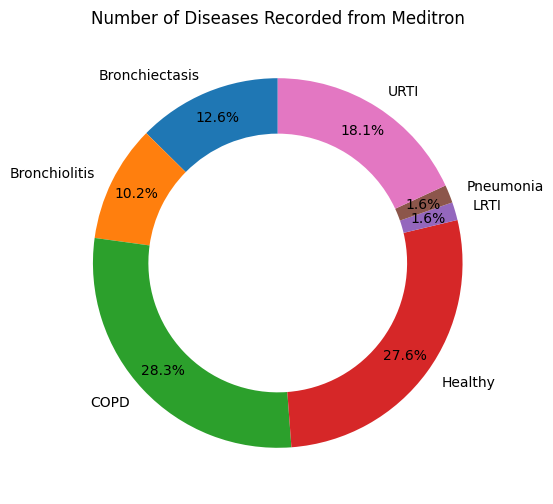

In [42]:
# Group by 'recording_equipment' and 'diagnosis' and count the number of occurrences
grouped = df.groupby(['recording_equipment', 'diagnosis']).size().unstack()

# Fill NaN values with 0
grouped = grouped.fillna(0)

# Get the last equipment in the index
last_equipment = grouped.index[-1]

# Get the data for the last equipment
data = grouped.loc[last_equipment]
# Drop the diseases with zero value
data = data[data > 0]

# Create a pie chart for the last equipment
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))
plt.title(f'Number of Diseases Recorded from {last_equipment}')
plt.show()

COPD and Healthy cases are the most recorded, with 28.3% and 27.6% respectively.
URTI, Bronchiectasis, and Bronchiolitis also have notable percentages.
LRTI and Pneumonia are the least recorded, each at 1.6%.

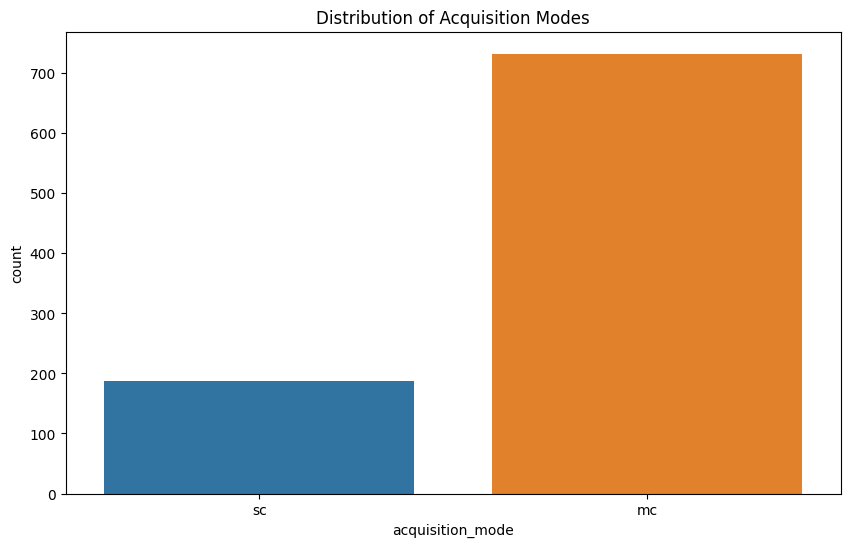

In [25]:
# Check the distribution of acquisition modes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='acquisition_mode')
plt.title('Distribution of Acquisition Modes')
plt.show()

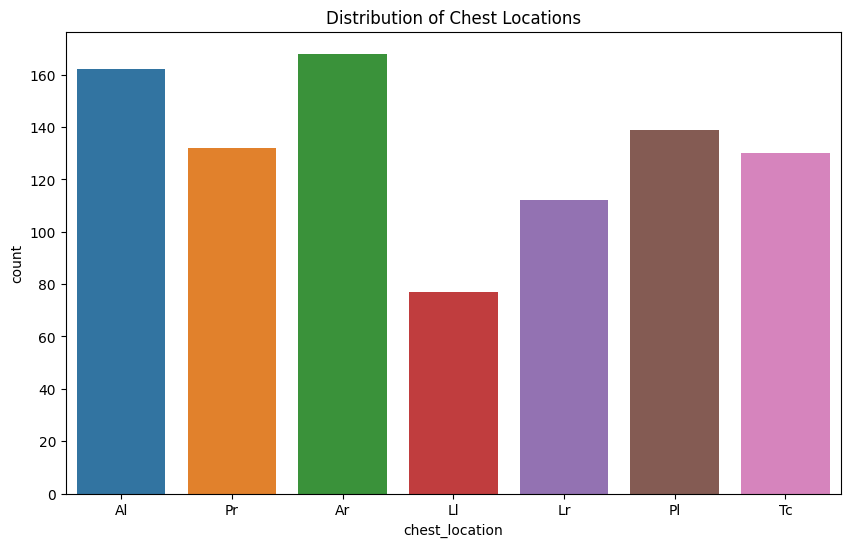

In [26]:
# Check the distribution of chest locations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='chest_location')
plt.title('Distribution of Chest Locations')
plt.show()

In [47]:
df = pd.read_csv(r'\RDM\Respiratory_Sound_Database\patient_detaila.csv')
df.head()

,patient_id,diagnosis,age,sex,adult_bmi,child_weight,child_height
0,101,URTI,3.00,F,NaN,19.0,99.0
1,102,Healthy,0.75,F,NaN,9.8,73.0
2,103,Asthma,70.00,F,33.00,NaN,NaN
3,104,COPD,70.00,F,28.47,NaN,NaN
4,105,URTI,7.00,F,NaN,32.0,135.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    126 non-null    int64  
 1   diagnosis     126 non-null    object 
 2   age           125 non-null    float64
 3   sex           125 non-null    object 
 4   adult_bmi     75 non-null     float64
 5   child_weight  44 non-null     float64
 6   child_height  42 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 7.0+ KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,126.0,163.500000,36.517119,101.00,132.250,163.5,194.750,226.0
age,125.0,42.992640,32.209070,0.25,4.000,60.0,71.000,93.0
adult_bmi,75.0,27.190000,5.372519,16.50,24.150,27.4,29.185,53.5
child_weight,44.0,21.361136,17.150885,7.14,11.755,15.1,24.325,80.0
child_height,42.0,104.652381,30.793128,64.00,81.250,99.5,117.750,183.0


In [58]:
df.describe(include='object')

,diagnosis,sex
count,126,125
unique,8,2
top,COPD,M
freq,64,79


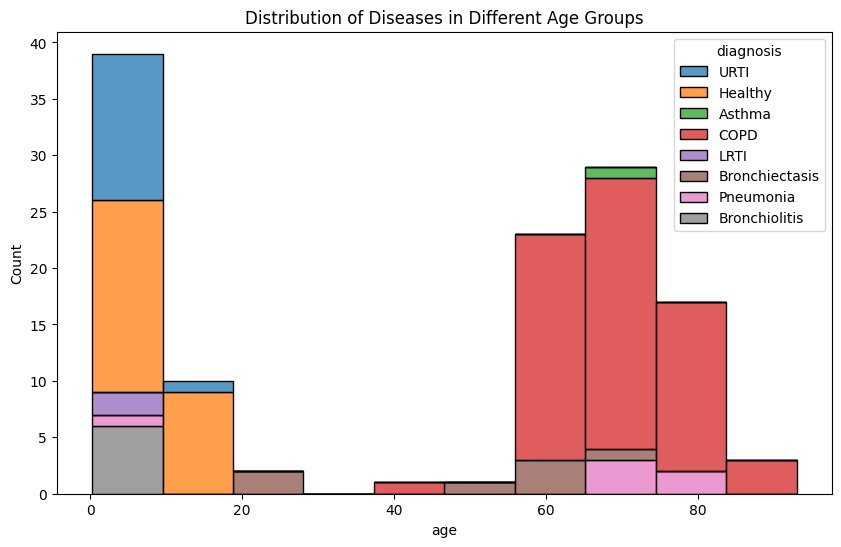

In [67]:
# Create a histogram to show the distribution of diseases in different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='diagnosis', multiple='stack', bins=10)
plt.title('Distribution of Diseases in Different Age Groups')
plt.show()

The highest counts are in the 0-20 and 60-80 age groups.
In the 0-20 age group, URTI and Healthy conditions are most common.
In the 60-80 age group, COPD is the most prevalent.
The age distribution indicates a potential age-related pattern in disease prevalence.


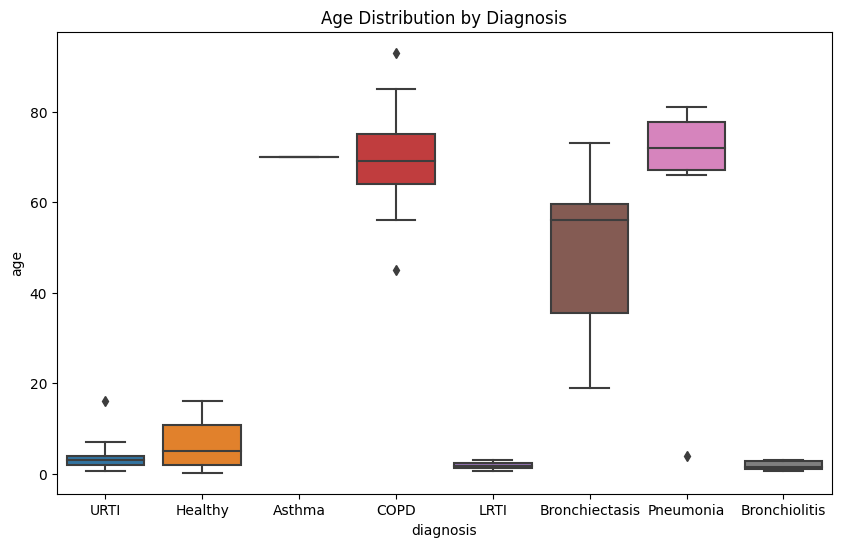

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis', y='age')
plt.title('Age Distribution by Diagnosis')
plt.show()

COPD is mainly diagnosed in older individuals (60-80 years).
Other conditions like URTI, Healthy, and Asthma are more common in younger individuals.
The plot highlights the central tendency and spread of ages for each diagnosis, indicating age as a factor in disease prevalence.


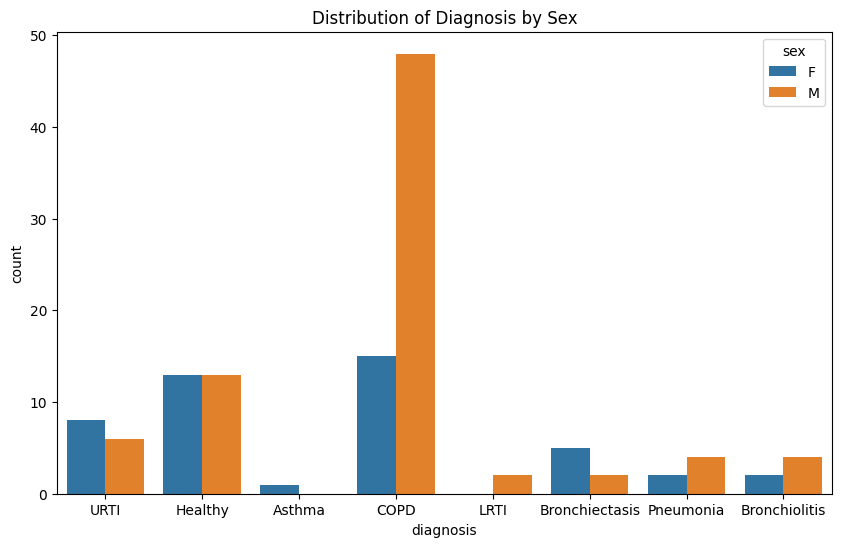

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diagnosis', hue='sex')
plt.title('Distribution of Diagnosis by Sex')
plt.show()

COPD is more common in males.
Healthy, URTI, and other conditions are relatively evenly distributed between sexes.
There is a notable gender disparity in COPD cases, which could indicate underlying factors such as lifestyle or genetic predisposition.